In [7]:
import os

import gym
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines.bench import Monitor
from stable_baselines.common.vec_env import DummyVecEnv, VecNormalize
from stable_baselines.common.policies import MlpPolicy, FeedForwardPolicy
from stable_baselines import results_plotter
from stable_baselines import *

In [11]:
import gym
import numpy as np

# Create log dir
log_dir = "tmp/"
os.makedirs(log_dir, exist_ok=True)

# Customize value network 
class CustomPolicy(FeedForwardPolicy):
    def __init__(self, *args, **kwargs):
        super(CustomPolicy, self).__init__(*args, **kwargs,
                                           net_arch=[dict(vf=[10, 7, 5])],
                                           feature_extraction="mlp")
        
# Create and wrap the environment
env = gym.make('NChain-v0')
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv(([lambda: env]))

model = TRPO(CustomPolicy, env, verbose=1)

# Train the agent
time_steps = 10000
model.learn(total_timesteps=time_steps)

********** Iteration 0 ************
Optimizing Policy...
sampling
done in 0.295 seconds
computegrad
done in 0.097 seconds
conjugate_gradient
      iter residual norm  soln norm
         0     0.0049          0
         1    0.00229      0.156
         2   0.000349      0.585
         3   3.92e-05      0.687
         4    2.3e-07      0.713
         5   6.45e-10      0.713
         6    6.5e-16      0.713
done in 0.077 seconds
Expected: 0.026 Actual: 0.025
Stepsize OK!
vf
done in 0.064 seconds
-----------------------------------------
| EpLenMean               | 1e+03       |
| EpRewMean               | 1.42e+03    |
| EpThisIter              | 1           |
| EpisodesSoFar           | 1           |
| TimeElapsed             | 0.603       |
| TimestepsSoFar          | 1024        |
| entloss                 | 0.0         |
| entropy                 | 0.6845485   |
| explained_variance_t... | 0.00335     |
| meankl                  | 0.009328524 |
| optimgain               | 0.024689304 

Stepsize OK!
vf
done in 0.017 seconds
-----------------------------------------
| EpLenMean               | 1e+03       |
| EpRewMean               | 2.04e+03    |
| EpThisIter              | 1           |
| EpisodesSoFar           | 8           |
| TimeElapsed             | 2.63        |
| TimestepsSoFar          | 8192        |
| entloss                 | 0.0         |
| entropy                 | 0.45123136  |
| explained_variance_t... | 0.00247     |
| meankl                  | 0.008406513 |
| optimgain               | 0.010550064 |
| surrgain                | 0.010550064 |
-----------------------------------------
********** Iteration 8 ************
Optimizing Policy...
sampling
done in 0.250 seconds
computegrad
done in 0.002 seconds
conjugate_gradient
      iter residual norm  soln norm
         0      0.001          0
         1   0.000221     0.0895
         2   1.37e-05      0.167
         3   8.19e-07      0.244
         4   1.11e-08      0.256
         5   1.53e-08      0.256

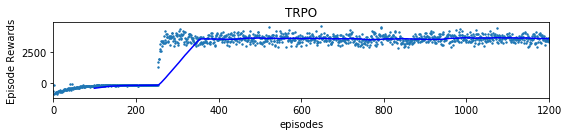

In [6]:
results_plotter.plot_results([log_dir], time_steps, results_plotter.X_EPISODES, "TRPO")
plt.show()